In [1]:
# Step 1: Import related pacakges
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image

In [2]:
# Step 2: Define activation function
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache
def tanh(z):
    """
    Implement the hyperbolic tangent (tanh) activation function.

    Arguments:
    z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as z
    cache -- z, stored for computing the backward pass efficiently
    """
    
    cache = z
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z)), cache


def leaky_relu(z, alpha=0.01):
    """
    Implement the Leaky ReLU activation function.

    Arguments:
    z -- Output of the linear layer, of any shape
    alpha -- Slope of the function for z < 0 (default is 0.01)

    Returns:
    A -- Post-activation parameter, of the same shape as z
    cache -- z, stored for computing the backward pass efficiently
    """
    
    cache = z
    return np.maximum(z, alpha * z), cache

In [3]:
# Step 3: Define initialize_parameters_deep function 
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters

In [4]:
# Step 4: Define linear forward function
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = W.dot(A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [5]:
# Step 5: Define linear_activation_forward 
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    elif activation == "tanh":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = tanh(Z)
    elif activation == "leaky_relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = leaky_relu(Z)
    else:
        print("Incorrect activation parameters!!!")
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [6]:
# Step 6: Define L_model_forward function  
def L_model_forward(X, parameters, model_archi):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = model_archi["act"][l-1])
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = model_archi["act"][L-1])
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [7]:
# Step 7: Define cost function
def compute_cost(AL, Y, C):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    if C == "cross-entropy":
        cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    elif C == "MSE":
        cost = (1./m) * (np.linalg.norm(Y-AL) ** 2)
    else:
        print("Invalid cost function.")
        
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [8]:
# Step 8: Define linear backward function
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [9]:
# Step 9: Define act_backward function
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def tanh_backward(dA, cache):
    """
    Implement the backward propagation for a single tanh unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' stored during forward propagation, where Z = linear_cache[0]

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    Z = cache
    A = np.tanh(Z)
    dZ = dA * (1 - np.power(A, 2))

    assert (dZ.shape == Z.shape)
    
    return dZ

def leaky_relu_backward(dA, cache, alpha=0.01):
    """
    Implement the backward propagation for a single Leaky ReLU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' stored during forward propagation
    alpha -- Slope of the negative part of the activation (default is 0.01)

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    Z = cache
    dZ = np.array(dA, copy=True)
    
    # When Z <= 0, set dZ to alpha, instead of 0 in the ReLU backward step
    dZ[Z <= 0] = alpha * dZ[Z <= 0]
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [10]:
# Step 10: Define linear_activation_backward function
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    elif activation == "tanh":
        dZ = tanh_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    elif activation == "leaky_relu":
        dZ = leaky_relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    else:
        print("Incorrect activation parameters!!!")
    
    return dA_prev, dW, db

In [11]:
# Step 11: Define L_model_backward function
def L_model_backward(AL, Y, caches, model_archi):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (there are (L-1) or them, indexes from 0 to L-2)
                the cache of linear_activation_forward() with "sigmoid" (there is one, index L-1)
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    if model_archi["cost_function"] == "cross-entropy":
        dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    elif model_archi["cost_function"] == "MSE":
        dAL = AL - Y
    else:
        print("Invalid cost function.")
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = model_archi["act"][L-1])
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = model_archi["act"][l])
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [12]:
# Step 12: define update parameters functions
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

In [13]:
# Step 13: Define predict function and accuracy function
def predict(X, y, parameters, model_archi):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters, model_archi)
    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    return p, np.squeeze(probas)

def accuracy(X, y, parameters, model_archi): # ok
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))

    probas, caches = L_model_forward(X, parameters, model_archi)
    
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    return np.sum((p == y)/m)

In [14]:
# Step 14: Define print_mislabeled_images function
def print_mislabeled_images(classes, X, y, p): # ok
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))


In [15]:
# Step 15: Define train_L_layer_NN_model function 
def train_L_layer_NN_model(X, Y, model_archi, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(model_archi["layers_dims"]) # ok

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters, model_archi)
        
        # Compute cost.
        cost = compute_cost(AL, Y, model_archi["cost_function"]) # ok

        # Backward propagation.
        grads = L_model_backward(AL, Y, caches, model_archi)

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate) # ok
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

In [16]:
# Step 16: Define define_model function
def define_model(layers, cost_function, act):
    model_archi = {}
    model_archi["layers_dims"] = layers
    model_archi["cost_function"] = cost_function
    model_archi["act"] = act

    assert len(layers) - 1 == len(act) 
    return model_archi

In [17]:
# Step 17: Load in data
def load_data(path_train, path_test):
    train_dataset = h5py.File(path_train, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(path_test, "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

train_x_orig, train_y, test_x_orig, test_y, classes = load_data(path_train = r"C:\Users\leesi\OneDrive\Desktop(Major File)\Study Materials\Notes Jotting\Machine Learning - CS229\ASM\Neural Network and Deep Learning\W4A2\datasets\train_catvnoncat.h5", path_test = r"C:\Users\leesi\OneDrive\Desktop(Major File)\Study Materials\Notes Jotting\Machine Learning - CS229\ASM\Neural Network and Deep Learning\W4A2\datasets\test_catvnoncat.h5")

In [18]:
# Explore the dataset - 1
print(train_y)
print(classes)
print(classes[0])
print(classes[1])
print(type(classes))

[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]
[b'non-cat' b'cat']
b'non-cat'
b'cat'
<class 'numpy.ndarray'>


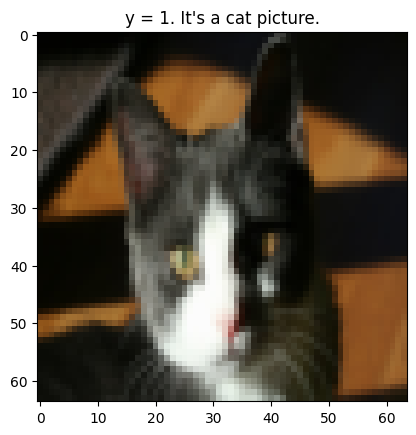

In [19]:
# Explore the dataset - 2
index = 19
plt.title("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")
plt.imshow(train_x_orig[index])

In [20]:
# Step 18: Data cleansing
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape)) # 209 data points for train
print ("test_x's shape: " + str(test_x.shape)) # 50 data points for test
print ("train_x's shape: " + str(train_y.shape)) # 209 data points for train
print ("test_x's shape: " + str(test_y.shape)) # 50 data points for test

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)
train_x's shape: (1, 209)
test_x's shape: (1, 50)


In [21]:
# Step 19: Start the training process
model_archi = define_model(layers = [train_x.shape[0], 20, 9, 5, 1], cost_function = "cross-entropy", act = ["tanh", "relu","tanh", "sigmoid"])
parameters, costs = train_L_layer_NN_model(train_x, train_y, model_archi, num_iterations = 3000, print_cost = True)

Cost after iteration 0: 0.7231527462598004
Cost after iteration 100: 0.6331884620076168
Cost after iteration 200: 0.6003602192788785
Cost after iteration 300: 0.5301320043063096
Cost after iteration 400: 0.4638208264939717
Cost after iteration 500: 0.4071322493478306
Cost after iteration 600: 0.3562411373471334
Cost after iteration 700: 0.2951825030791421
Cost after iteration 800: 0.2420106927438211
Cost after iteration 900: 0.1984176181340061
Cost after iteration 1000: 0.1478700823377197
Cost after iteration 1100: 0.11808147578724436
Cost after iteration 1200: 0.09924407699708493
Cost after iteration 1300: 0.08407964923000873
Cost after iteration 1400: 0.07272629740876514
Cost after iteration 1500: 0.06372757183974444
Cost after iteration 1600: 0.05645100055766024
Cost after iteration 1700: 0.05051309565148069
Cost after iteration 1800: 0.04561226435009366
Cost after iteration 1900: 0.04150592222582833
Cost after iteration 2000: 0.038018190815902075
Cost after iteration 2100: 0.035020

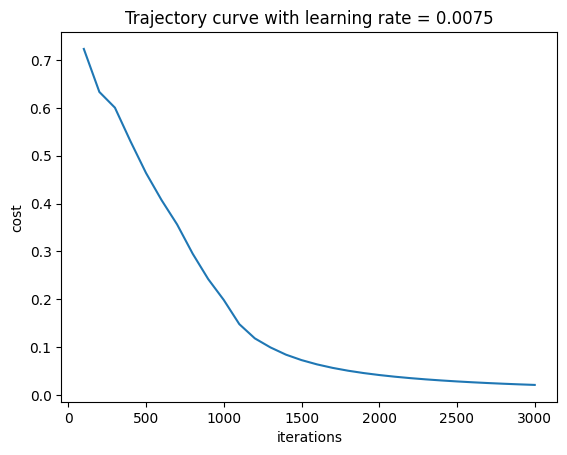

In [22]:
# Step 20: Plot trajectory curve
def plot_costs(costs, learning_rate=0.0075):
    y = np.squeeze(costs)
    x = [(i + 1) * 100 for i in range(len(y))]
    plt.plot(x, y)
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title("Trajectory curve with learning rate = " + str(learning_rate))
    plt.show()

plot_costs(costs, learning_rate=0.0075)

In [23]:
# Step 21: Model evaluation
train_acc = accuracy(train_x, train_y, parameters, model_archi)
test_acc = accuracy(test_x, test_y, parameters, model_archi)
print("The training accuracy is: " + str(train_acc) + ".")
print("The testing accuracy is: " + str(test_acc) + ".")

The training accuracy is: 0.9999999999999998.
The testing accuracy is: 0.78.


y = 0.0, your L-layer model predicts the below picture is a cat with probability 0.013549882193316175.


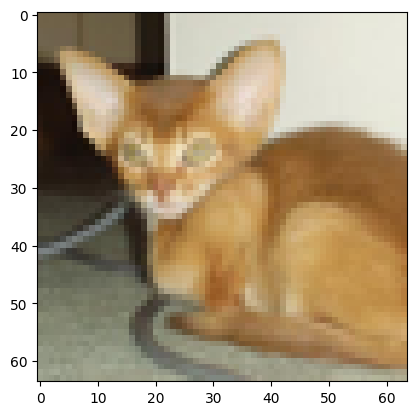

In [24]:
# Step 22: Define testing function and test my own images
def test_images(path_img, label, parameters, model_archi):
    my_image = path_img # change this to the name of your image file 
    my_label_y = [label] # the true class of your image (1 -> cat, 0 -> non-cat)
    num_px = int((model_archi["layers_dims"][0]/3) ** 0.5)
    image = np.array(Image.open(my_image).resize((num_px, num_px)))
    plt.imshow(image)
    image = image / 255.
    image = image.reshape((1, num_px * num_px * 3)).T
    my_predicted_image, probas = predict(image, my_label_y, parameters, model_archi)
    print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts the below picture is a cat with probability " + str(probas) + ".")

test_images(r"C:\Users\leesi\Documents\Favorites\Data Sources\Cat and dog classification\Dataset\cat\Abyssinian_131_jpg.rf.3aeee0801499f335e3a59b51189e1351.jpg", 1, parameters, model_archi)

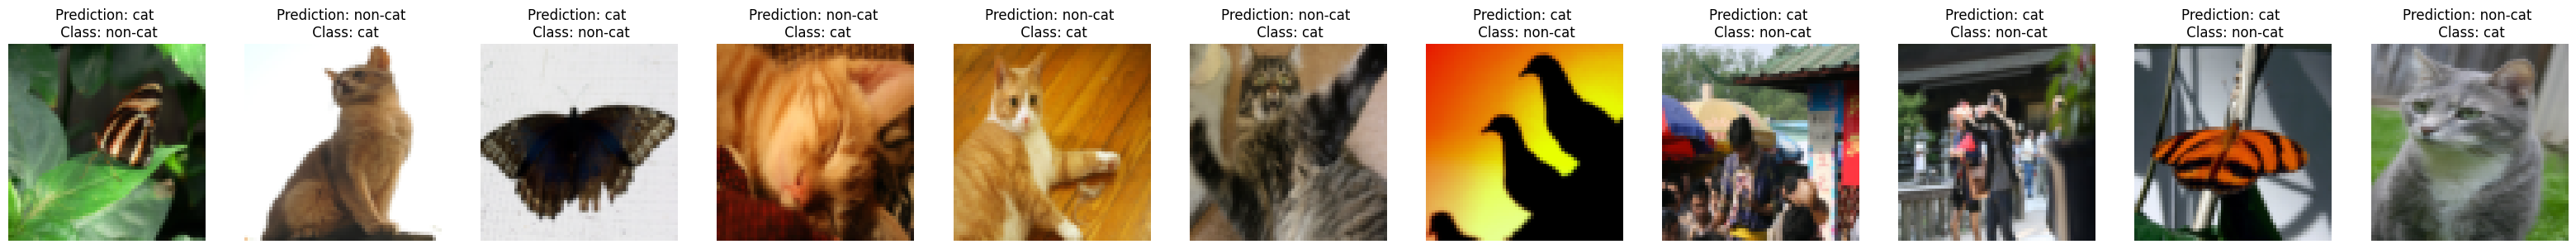

In [25]:
# Step 23: Print all the incorrectly classified images
print_mislabeled_images(classes, test_x, test_y, predict(test_x, test_y, parameters, model_archi)[0])